# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

In [4]:
city = "Denver"
url = "http://api.openweathermap.org/data/2.5/weather?"
target_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
response = requests.get(target_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 49},
 'cod': 200,
 'coord': {'lat': 39.74, 'lon': -104.98},
 'dt': 1579970638,
 'id': 5419384,
 'main': {'feels_like': 36.88,
          'humidity': 48,
          'pressure': 1016,
          'temp': 42.06,
          'temp_max': 46.99,
          'temp_min': 30.99},
 'name': 'Denver',
 'sys': {'country': 'US',
         'id': 2010438,
         'sunrise': 1579961633,
         'sunset': 1579997409,
         'type': 3},
 'timezone': -25200,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 59, 'gust': 3, 'speed': 1.01}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
url = "http://api.openweathermap.org/data/2.5/weather?"

temp = []
humidity = []
cloudiness = []
wind_speed = []
town = []
lat = []
long = []
datetime = []
country = []
count = 0

for city in cities:
    target_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    response = requests.get(target_url).json()
    try:
        temperature = response['main']['temp']
        humid = response['main']['humidity']
        cloudy = response['clouds']['all']
        windy = response['wind']['speed']
        latitude = response['coord']['lat']
        longitude = response['coord']['lon']
        dt = response['dt']
        place = response['sys']['country']
        temp.append(temperature)
        humidity.append(humid)
        cloudiness.append(cloudy)
        wind_speed.append(windy)
        town.append(city)
        lat.append(latitude)
        datetime.append(dt)
        long.append(longitude)
        country.append(place)
        count += 1
        print(f"city number: {count}, city name: {city}")
    except KeyError:
        print("city not found")
        


city number: 1, city name: egvekinot
city number: 2, city name: san patricio
city number: 3, city name: busselton
city number: 4, city name: punta arenas
city number: 5, city name: kishtwar
city number: 6, city name: carnarvon
city number: 7, city name: ugoofaaru
city number: 8, city name: new norfolk
city number: 9, city name: marion
city number: 10, city name: kavaratti
city not found
city number: 11, city name: ahipara
city number: 12, city name: ribeira grande
city number: 13, city name: mataura
city number: 14, city name: saskylakh
city number: 15, city name: yellowknife
city number: 16, city name: atuona
city number: 17, city name: rikitea
city number: 18, city name: cape town
city number: 19, city name: itamarandiba
city number: 20, city name: viedma
city number: 21, city name: deputatskiy
city number: 22, city name: port elizabeth
city number: 23, city name: misratah
city not found
city not found
city number: 24, city name: punta cardon
city number: 25, city name: saldanha
city

city number: 212, city name: lebu
city number: 213, city name: kangaatsiaq
city number: 214, city name: mokrousovo
city not found
city number: 215, city name: fereydun kenar
city number: 216, city name: tucupita
city number: 217, city name: mahina
city number: 218, city name: port lincoln
city number: 219, city name: zhigansk
city number: 220, city name: haines junction
city number: 221, city name: bonavista
city not found
city number: 222, city name: solenzo
city number: 223, city name: wabana
city number: 224, city name: nantucket
city number: 225, city name: obidos
city number: 226, city name: norman wells
city not found
city number: 227, city name: guane
city number: 228, city name: spokane
city number: 229, city name: codrington
city number: 230, city name: guerrero negro
city number: 231, city name: east london
city number: 232, city name: bunia
city number: 233, city name: shubarkuduk
city number: 234, city name: chihuahua
city number: 235, city name: nuuk
city number: 236, city

city number: 420, city name: dera ghazi khan
city number: 421, city name: vallenar
city number: 422, city name: chitral
city number: 423, city name: kaeo
city number: 424, city name: leningradskiy
city number: 425, city name: merauke
city number: 426, city name: jalu
city number: 427, city name: bathsheba
city not found
city number: 428, city name: ponta delgada
city number: 429, city name: nijar
city not found
city number: 430, city name: lock haven
city number: 431, city name: avera
city not found
city number: 432, city name: tovuz
city number: 433, city name: vestmannaeyjar
city number: 434, city name: paamiut
city number: 435, city name: san vicente
city number: 436, city name: zabol
city number: 437, city name: alugan
city number: 438, city name: mutoko
city number: 439, city name: kamphaeng phet
city number: 440, city name: nelson bay
city number: 441, city name: tete
city number: 442, city name: kieta
city number: 443, city name: cairns
city number: 444, city name: rochegda
city

In [55]:
weather_data = pd.DataFrame({"City": town,
                            "Temperature": temp,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed (mph)": wind_speed,
                            "Latitude": lat,
                            "Longitude": long,
                            "Country": country,
                            "Datetime": datetime})

weather_data.head(20)

,City,Temperature,Humidity,Cloudiness,Wind Speed (mph),Latitude,Longitude,Country,Datetime
0,egvekinot,-6.30,96,71,0.63,66.32,-179.17,RU,1579990858
1,san patricio,79.16,65,58,7.52,19.22,-104.70,MX,1579990926
2,busselton,65.70,59,1,9.60,-33.65,115.33,AU,1579990927
3,punta arenas,51.01,62,0,23.00,-53.15,-70.92,CL,1579990927
4,kishtwar,9.45,98,100,3.27,33.32,75.77,IN,1579990927
5,carnarvon,78.64,64,0,19.28,-24.87,113.63,AU,1579990928
6,ugoofaaru,82.31,68,100,8.21,5.67,73.00,MV,1579990928
7,new norfolk,63.39,63,77,1.99,-42.78,147.06,AU,1579990929
8,marion,32.25,95,90,17.22,39.77,-86.16,US,1579990929
9,kavaratti,81.25,66,77,3.42,10.57,72.64,IN,1579990930


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')
weather_data.to_csv(r"../output_data\weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

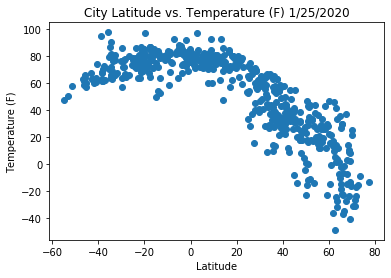

In [57]:
lat = weather_data["Latitude"]
temp = weather_data["Temperature"]
plt.scatter(lat,temp)
plt.title("City Latitude vs. Temperature (F) 1/25/2020")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#plt.savefig('foo.png')
plt.savefig("../output_data\lat_vs_temp.png")

In [1]:
print("This graph shows that the closer a city is to the equator (a latitude of 0), the higher the temperatures are that they experience. As cities have higher or lower latitudes than 0 and are further away fromt the equator, the lower the temperatures tend to be.")

This graph shows that the closer a city is to the equator (a latitude of 0), the higher the temperatures are that they experience. As cities have higher or lower latitudes than 0 and are further away fromt the equator, the lower the temperatures tend to be.


#### Latitude vs. Humidity Plot

The correlation between both factors is 0.25. This tells us latitude is not a good predictor of humidity levels


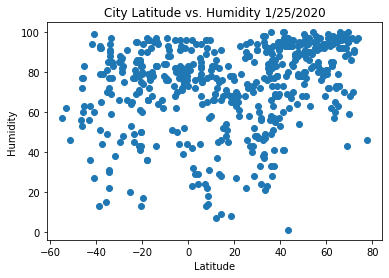

In [58]:
humidity = weather_data['Humidity']
plt.scatter(lat,humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity 1/25/2020")
correlation = st.pearsonr(lat,humidity)
plt.savefig("../output_data\lat_vs_humidity.png")
print(f"The correlation between both factors is {round(correlation[0],2)}. This tells us latitude is not a good predictor of humidity levels")

#### Latitude vs. Cloudiness Plot

The correlation between both factors is 0.21. This tells us latitude is not a good predictor of cloudiness.


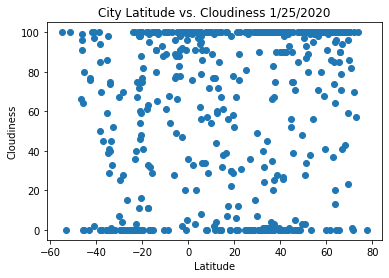

In [59]:
cloudy = weather_data["Cloudiness"]
plt.scatter(lat,cloudy)
plt.title("City Latitude vs. Cloudiness 1/25/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
correlation2 = st.pearsonr(lat,cloudy)
plt.savefig("../output_data\lat_vs_cloudiness.png")
print(f"The correlation between both factors is {round(correlation2[0],2)}. This tells us latitude is not a good predictor of cloudiness.")

#### Latitude vs. Wind Speed Plot

The correlation between both factors is -0.02. This tells us there is no relationship between how close a city is to the equator and how windy that city is.


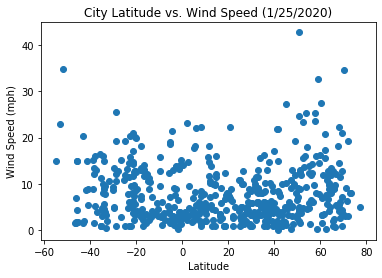

In [60]:
wind = weather_data['Wind Speed (mph)']
plt.scatter(lat,wind)
plt.title('City Latitude vs. Wind Speed (1/25/2020)')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data\lat_vs_wind.png")
correlation3 = st.pearsonr(lat,wind)
print(f"The correlation between both factors is {round(correlation3[0],2)}. This tells us there is no relationship between how close a city is to the equator and how windy that city is.")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [28]:
# Create Northern and Southern Hemisphere DataFrames

northern = weather_data.loc[weather_data["Latitude"] >= 0, ["City", "Temperature", "Humidity", "Cloudiness", "Wind Speed (mph)", "Latitude"]]

northern.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed (mph),Latitude
0,egvekinot,-6.30,96,71,0.63,66.32
1,san patricio,79.16,65,58,7.52,19.22
4,kishtwar,9.45,98,100,3.27,33.32
6,ugoofaaru,82.31,68,100,8.21,5.67
8,marion,32.38,95,90,17.22,39.77


In [29]:
southern = weather_data.loc[weather_data["Latitude"] < 0, ["City", "Temperature", "Humidity", "Cloudiness", "Wind Speed (mph)", "Latitude"]]
southern.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed (mph),Latitude
2,busselton,64.09,61,1,9.60,-33.65
3,punta arenas,50.00,76,0,23.00,-53.15
5,carnarvon,78.64,64,0,19.28,-24.87
7,new norfolk,62.96,65,77,3.00,-42.78
10,ahipara,82.00,81,86,1.01,-35.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.86
This graph shows that the higher the latitude is for a city in the Northern Hemisphere, the colder the temperatures will be, and the lower the latitude is, the higher the temperatures will be.


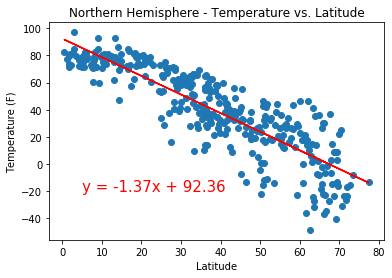

In [68]:
x = northern["Latitude"]
y = northern["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line,(5,-20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.savefig("../output_data\lat_vs_temp_north.png")
print(f"The r-squared is: {round(rvalue,2)}")
print("This graph shows that the higher the latitude is for a city in the Northern Hemisphere, the colder the temperatures will be, and the lower the latitude is, the higher the temperatures will be.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.52
In the Southern Hemisphere, higher latitudes are associated with higher temperatures.


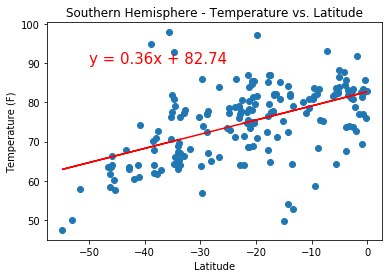

In [69]:
xs = southern["Latitude"]
ys = southern["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
regress_values = xs * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs, ys)
plt.plot(xs, regress_values, "r-")
plt.annotate(line,(-50,90), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.savefig("../output_data\lat_vs_temp_south.png")
print(f"The r-squared is: {round(rvalue,2)}")
print("In the Southern Hemisphere, higher latitudes are associated with higher temperatures.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.42
In the Northern Hemisphere, higher latitudes experience slightly higher levels of humidity, but the relationship between the two is not very strong


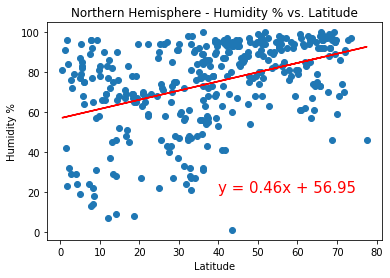

In [72]:
y_h = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_h)
regress_values = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y_h)
plt.plot(x, regress_values, "r-")
plt.annotate(line,(40,20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Northern Hemisphere - Humidity % vs. Latitude")
plt.savefig("../output_data\lat_humid_north.png")
print(f"The r-squared is: {round(rvalue,2)}")
print("In the Northern Hemisphere, higher latitudes experience slightly higher levels of humidity, but the relationship between the two is not very strong")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19
In the Southern Hemisphere, latitude is not a good predictor of humidity


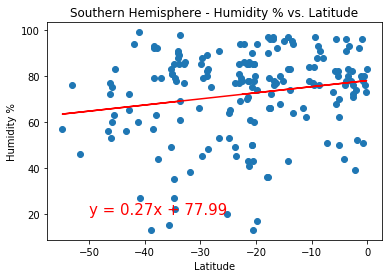

In [73]:
y_hs = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, y_hs)
regress_values = xs * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs, y_hs)
plt.plot(xs, regress_values, "r-")
plt.annotate(line,(-50,20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Southern Hemisphere - Humidity % vs. Latitude")
plt.savefig("../output_data\lat_humid_south.png")
print(f"The r-squared is: {round(rvalue,2)}")
print("In the Southern Hemisphere, latitude is not a good predictor of humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15
In the Northern Hemisphere, latitude is not a good predictor of cloudiness


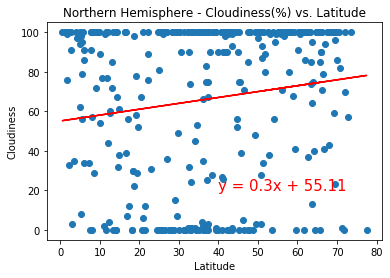

In [74]:
y_c = northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_c)
regress_values = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y_c)
plt.plot(x, regress_values, "r-")
plt.annotate(line,(40,20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude")
plt.savefig("../output_data\lat_cloud_north.png")
print(f"The r-squared is: {round(rvalue,2)}")
print("In the Northern Hemisphere, latitude is not a good predictor of cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.29
In the Southern Hemisphere, latitude is not a good predictor of cloudiness


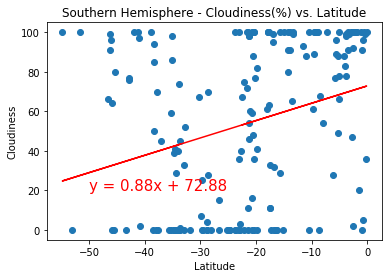

In [75]:
y_cs = southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, y_cs)
regress_values = xs * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs, y_cs)
plt.plot(xs, regress_values, "r-")
plt.annotate(line,(-50,20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude")
plt.savefig("../output_data\lat_cloud_south.png")
print(f"The r-squared is: {round(rvalue,2)}")
print("In the Southern Hemisphere, latitude is not a good predictor of cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16
In the Northern Hemisphere, latitude is not a good predictor of wind speed


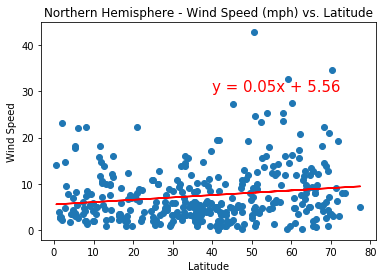

In [76]:
y_w = northern["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_w)
regress_values = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y_w)
plt.plot(x, regress_values, "r-")
plt.annotate(line,(40,30), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.savefig("../output_data\lat_wind_north.png")
print(f"The r-squared is: {round(rvalue,2)}")
print("In the Northern Hemisphere, latitude is not a good predictor of wind speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.15
In the Southern Hemisphere, latitude is not a good predictor of wind speed


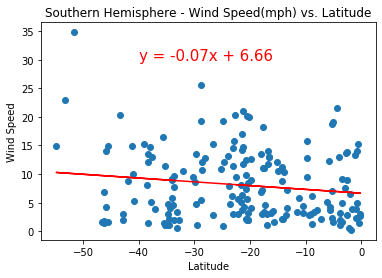

In [77]:
y_ws = southern["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, y_ws)
regress_values = xs * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs, y_ws)
plt.plot(xs, regress_values, "r-")
plt.annotate(line,(-40,30), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude")
plt.savefig("../output_data\lat_wind_south.png")
print(f"The r-squared is: {round(rvalue,2)}")
print("In the Southern Hemisphere, latitude is not a good predictor of wind speed")